In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF

# Conjunto de dados 1

Esses dados consistem do número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, em cada uma das 210 categorias que o Facebook atribui a cada página

Cada linha de spatial é um usuário e cada coluna é uma categoria.

In [88]:
# loading the spatial dataset as a numpy array

data = np.loadtxt('data/social/data/spatial_data.txt')
spatial = data[:,1:]
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.DataFrame(spatial)

# Conjunto de dados 2

Esses dados contém o número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, agregados diariamente.

Linhas de FBTemporal são usuários e colunas são dias.

In [89]:
# data = np.loadtxt('data/social/data/temporal_data.txt')
# FBTemporal = data[:,1:]
# pd.DataFrame(FBTemporal[:,:])

In [90]:
# standardizing the data matrix to make the use of PCA possible (in each column, mean = 0 and standard deviation = 1)

std_spatial = StandardScaler().fit_transform(spatial)
# pd.DataFrame(std_spatial).head(10)

In [91]:
# applying the PCA algorithm to give the normal subspace matrix which is 8982 x 5.
# this allows the points of the user behavior matrix (X) to be projected into the normal subspace,
# and it gives us the normal behavior portion. subtracting the normal behavior portion from X, we get
# the residual portion of user behavior.

pca = PCA(n_components=5)
pca.fit(std_spatial)
normal_subspace = pca.components_.T             # transposing because PCA in sklearn makes each eigenvector become a line instead of a column.
normal_behavior_portion = (np.matmul(np.matmul(normal_subspace, normal_subspace.T), std_spatial.T)).T
residual_behavior_portion = std_spatial - normal_behavior_portion

# 210x5 5x210 210x8982 ?????

# pd.DataFrame(normal_subspace)
# pd.DataFrame(normal_behavior_portion).head(10)
pd.DataFrame(residual_behavior_portion).head(10)
# pd.DataFrame(normal_subspace).head(10)

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.024,0.015,-0.041,-0.075,-0.013,-0.259,-0.048,-0.221,-0.254,-0.016,...,-0.080,-0.045,0.016,-0.120,4.152,-0.031,-0.127,-0.052,-0.062,-0.119
1,-0.005,0.032,-0.003,-0.005,0.009,-0.066,-0.027,-0.037,0.034,-0.017,...,-0.010,-0.008,0.022,-0.007,-0.002,0.002,0.008,-0.014,-0.015,-0.018
2,-0.479,0.362,-1.022,0.309,0.477,-1.062,0.856,-0.646,3.931,-0.012,...,-0.367,-0.048,-0.761,-0.557,-0.794,-0.533,-1.053,-0.186,1.236,-0.212
3,-0.006,0.031,-0.004,-0.005,0.001,-0.073,-0.027,-0.038,0.031,-0.017,...,-0.012,-0.008,-0.003,-0.003,-0.003,0.004,0.012,-0.011,-0.024,-0.022
4,-0.007,0.023,-0.013,0.006,0.005,-0.066,0.257,-0.035,0.042,-0.016,...,-0.009,-0.007,-0.013,-0.010,-0.003,-0.003,0.005,-0.017,-0.019,-0.005
5,0.001,0.033,0.001,0.009,0.011,-0.068,-0.022,-0.039,0.031,-0.017,...,-0.011,-0.008,-0.001,-0.006,-0.003,0.004,0.011,-0.014,-0.014,-0.007
6,-0.019,0.027,-0.043,-0.009,-0.017,-0.080,-0.065,-0.045,0.030,-0.016,...,-0.015,-0.008,-0.049,-0.028,-0.021,-0.020,-0.026,-0.025,-0.037,0.161
7,-0.010,0.025,-0.044,0.011,0.009,0.232,-0.068,-0.040,0.045,-0.016,...,-0.010,-0.009,-0.032,-0.040,-0.019,-0.027,-0.037,-0.036,-0.012,0.014
8,-0.009,0.026,-0.004,-0.014,-0.011,0.197,-0.026,-0.048,0.015,-0.016,...,-0.016,-0.008,0.027,-0.001,-0.007,0.007,0.014,-0.008,-0.037,0.052
9,0.001,0.034,-0.000,0.010,0.008,-0.071,-0.023,-0.041,0.029,-0.017,...,-0.011,-0.008,-0.002,-0.006,-0.004,0.003,0.010,-0.014,-0.017,-0.007


In [118]:
# calculating the l2 norm of each line in the residual behavior portion matrix.
# the l2 norm is the squared root of the sum of squares of each element in a vector.
# this value, along with a given threshold, is what makes possible to detect anomalous users.

individual_norms = np.sqrt(np.sum(np.power(residual_behavior_portion, 2), axis = 1))

pd.DataFrame(individual_norms).head(10)
# individual_norms = sorted(individual_norms, reverse = False)
# pd.DataFrame(sorted(individual_norms, reverse=False))
# pd.DataFrame(np.argsort(-individual_norms))

,0
0,5.438
1,0.430
2,19.372
3,0.508
4,0.452
5,0.270
6,2.408
7,1.480
8,1.009
9,0.299


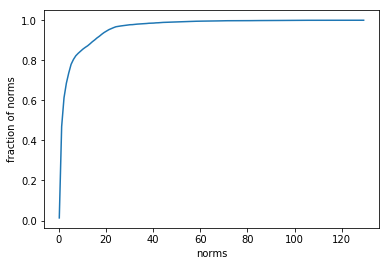

In [121]:
# plotting the ECDF (empirical cumulative distribution function) of the norms matrix.
# this gives us a graph with y corresponding to 
# the threshold will be selected as a value which will classify 3% of users as anomalous.
# some of the code is from https://www.codementor.io/kripanshubharga/calculate-ecdf-in-python-gycltzxi3

x_values = np.linspace(start=min(individual_norms), stop=max(individual_norms), num=len(individual_norms))
data_size = individual_norms.size

y_values = []
for i in x_values:
    temp = individual_norms[individual_norms <= i]
    value = temp.size / data_size
    y_values.append(value)

plt.plot(x_values, y_values)
plt.xlabel('norms')
plt.ylabel('fraction of norms')
plt.show()


cumulative_distribution = np.array(y_values)
# ycut = np.array(np.where(cumulative_distribution >= 0.97)).T
# pd.DataFrame(ycut)

